In [2]:
# Load libraries
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import networkx as nx
import operator

In [132]:
# Retrieve data from the database
sql_con = pymysql.connect(host='104.196.212.179', port=3306, 
                          user='root', passwd='data620pw',
                          db='billsdata')

members = pd.read_sql('SELECT name, party FROM members;', con=sql_con)
sponsorships = pd.read_sql('SELECT cs.name AS Source, s.name AS Target, COUNT(*) AS EdgeNo '
                           'FROM sponsors AS s INNER JOIN cosponsors AS cs '
                           'ON s.billID = cs.billID '
                           'GROUP BY Source, Target;', con=sql_con)

sql_con.close()

In [133]:
# Function to convert party affiliation to color
def party_color(p):
    if p == 'Democratic':
        return 'blue'
    elif p == 'Republican':
        return 'red'
    else:
        return 'white'

# Initialize graph
G = nx.DiGraph()

# Add nodes with attributes
for index, row in members.iterrows():
    G.add_node(row['name'], party=row['party'], color=party_color(row['party']))

# Add edges with weights
# Weight is equal to number of cosponsorships between nodes
for index, row in sponsorships.iterrows():
    G.add_edge(row['Source'], row['Target'], weight = row['EdgeNo'])

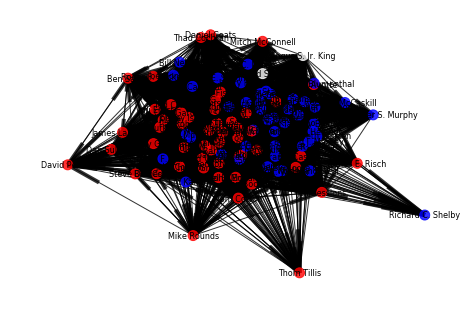

In [224]:
# Draw graph
colormap = []
for n in G.nodes():
    colormap.append(G.node[n]['color'])
pos = nx.spring_layout(G, k=0.3, iterations=10)
nx.draw(G, with_labels=True, pos=pos, 
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()

In [135]:
nx.number_of_nodes(G)

100

In [136]:
nx.number_of_edges(G)

6200

In [137]:
nx.diameter(G)

3

In [138]:
nx.average_shortest_path_length(G)

1.373939393939394

In [163]:
o = G.out_degree(weight='weight')
s = sorted(o.items(), key=operator.itemgetter(1), reverse=True)[0:10]
for n, c in s:
    print '%-25s %-13s %-3s' % (n, G.node[n]['party'], c)

Kirsten E. Gillibrand     Democratic    341
Richard Blumenthal        Democratic    341
Al Franken                Democratic    324
Kelly Ayotte              Republican    299
Tammy Baldwin             Democratic    293
Amy Klobuchar             Democratic    286
Edward J. Markey          Democratic    281
Charles E. Schumer        Democratic    273
Christopher A. Coons      Democratic    271
Jeff Merkley              Democratic    270


In [162]:
i = G.in_degree(weight='weight')
s = sorted(i.items(), key=operator.itemgetter(1), reverse=True)[0:10]
for n, c in s:
    print '%-25s %-13s %-3s' % (n, G.node[n]['party'], c)

Chuck Grassley            Republican    524
Benjamin L. Cardin        Democratic    430
Orrin G. Hatch            Republican    419
John Thune                Republican    398
Sherrod Brown             Democratic    380
Patty Murray              Democratic    376
Mark Steven Kirk          Republican    334
Ron Wyden                 Democratic    331
Jerry Moran               Republican    317
Kelly Ayotte              Republican    310


In [147]:
num_neighbors = nx.degree(G, weight='weight')
avg = 0
for key in num_neighbors:
    avg = avg + num_neighbors[key]
print avg/float(len(num_neighbors))

345.48


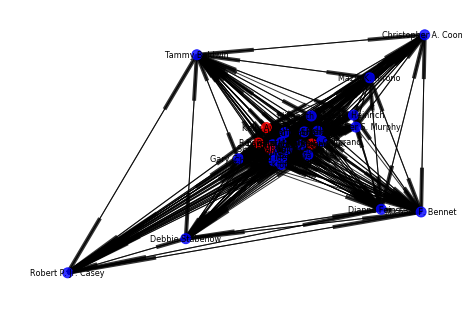

In [222]:
# Subgraph with nodes of at least 200 outgoing edges (weighted)
# Members cosponsoring a lot of other members
o = G.out_degree(weight='weight')
to_keep = [n for n in o if o[n]>200]
SG=G.subgraph(to_keep)

colormap = []
for n in SG.nodes():
    colormap.append(SG.node[n]['color'])
pos = nx.spring_layout(SG, iterations=10)
nx.draw(SG, with_labels=True, pos=pos,
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()

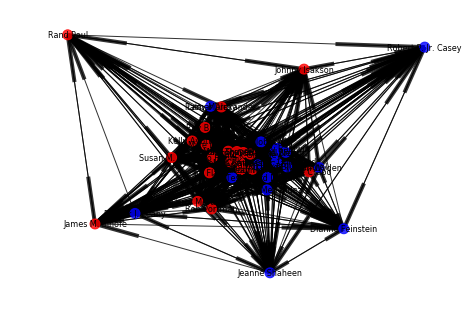

In [220]:
# Subgraph with nodes of at least 200 incoming edges (weighted)
# Members with a lot of cosponsors
i = G.in_degree(weight='weight')
to_keep = [n for n in o if i[n]>200]
SG=G.subgraph(to_keep)

colormap = []
for n in SG.nodes():
    colormap.append(SG.node[n]['color'])
pos = nx.spring_layout(SG, iterations=10)
nx.draw(SG, with_labels=True, pos=pos,
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()

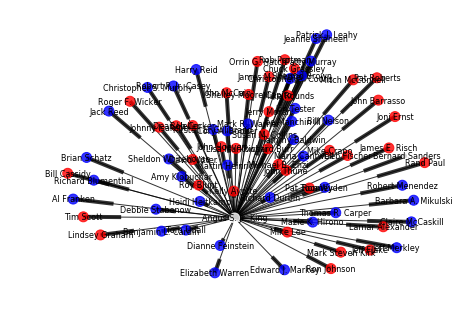

In [221]:
# All outgoing edges for Sen. King (independent)
SG = nx.ego_graph(G, 'Angus S. Jr. King', radius=1)
remove_edges = []
for e in SG.edges_iter():
    if e[0] != 'Angus S. Jr. King':
        remove_edges.append(e)
SG.remove_edges_from(remove_edges)

colormap = []
for n in SG.nodes():
    colormap.append(SG.node[n]['color'])
pos = nx.spring_layout(SG, iterations=10)
nx.draw(SG, with_labels=True, 
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()

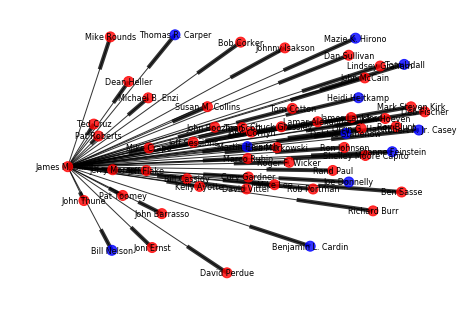

In [225]:
# All outgoing edges for Sen. Inhofe (most conservative)
SG = nx.ego_graph(G, 'James M. Inhofe', radius=1)
remove_edges = []
for e in SG.edges_iter():
    if e[0] != 'James M. Inhofe':
        remove_edges.append(e)
SG.remove_edges_from(remove_edges)

colormap = []
for n in SG.nodes():
    colormap.append(SG.node[n]['color'])
pos = nx.spring_layout(SG, iterations=10)
nx.draw(SG, with_labels=True, 
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()

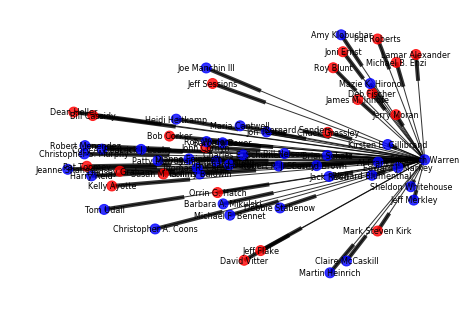

In [226]:
# All outgoing edges for Sen. Warren (most liberal)
SG = nx.ego_graph(G, 'Elizabeth Warren', radius=1)
remove_edges = []
for e in SG.edges_iter():
    if e[0] != 'Elizabeth Warren':
        remove_edges.append(e)
SG.remove_edges_from(remove_edges)

colormap = []
for n in SG.nodes():
    colormap.append(SG.node[n]['color'])
pos = nx.spring_layout(SG, iterations=10)
nx.draw(SG, with_labels=True, 
        node_color=colormap, 
        node_size=100, font_size=8, alpha=0.8)
plt.show()